<font color='tomato'><font color="#CC3D3D"><p>
# This reference model is based on:

* Applying BOW to raw transactions
* Applying Autoencoder (AE) to reduce the number of features
* Using K-fold CV to make predictions on all of training data
* Creating multiple DNNs by changing random seeds and Ensembling the models with power mean      

In [1]:
import pandas as pd
import numpy as np
import os
import random
import pickle
import klib
from tqdm import tqdm
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow import keras
import keras.backend as K
print(tf.__version__)

# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(seed, reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(seed)
    random.seed(seed)
    tf.compat.v1.set_random_seed(seed)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print(f"Random seeds reset: {seed}")  # optional
   
reset_seeds(1234)

2.3.1
Random seeds reset: 1


### Read Data

In [3]:
tr_train = pd.read_csv(r'C:/Users/MSI/Desktop/group1features/dat/train_transactions.csv', encoding='cp949')
tr_test = pd.read_csv(r'C:/Users/MSI/Desktop/group1features/dat/test_transactions.csv', encoding='cp949')
y_train = pd.read_csv(r'C:/Users/MSI/Desktop/group1features/dat/y_train.csv').gender
IDtest = tr_test.cust_id.unique()

tr_train.head()

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000


### Make BOW-based Features


In [4]:
features = ['goods_id', 'gds_grp_nm', 'gds_grp_mclas_nm']

tr_all = pd.concat([tr_train, tr_test])
tr_all['weekday'] = pd.to_datetime(tr_all.tran_date).dt.weekday
train = []
test = []

for f in features:
    for d,q in zip([train, test], ['cust_id not in @IDtest', 'cust_id in @IDtest']):
        d.append(pd.pivot_table(tr_all, index='cust_id', columns=f, values='amount',
                                aggfunc=lambda x: np.where(len(x) >=1, 1, 0), fill_value=0)                 
                 .reset_index()
                 .query(q)
                 .drop(columns=['cust_id']).values)
 
X_train, X_test = np.hstack(train), np.hstack(test)

X_train.shape, X_test.shape

((3500, 4179), (2482, 4179))

### Build Models with AE

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Random seeds reset: 0
DAE learning curve 1/5


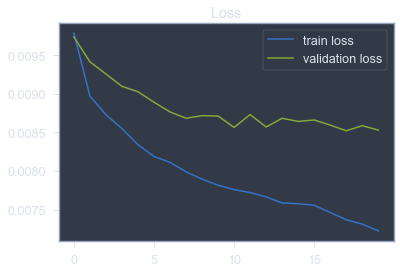

DNN learning curve 1/5


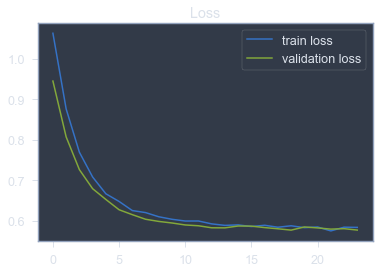

AUC 0.7625705858297588
DAE learning curve 2/5


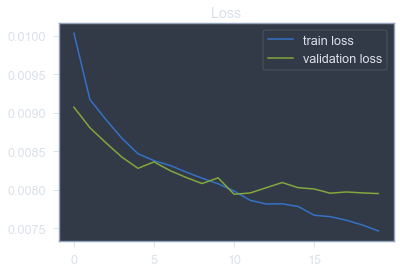

DNN learning curve 2/5


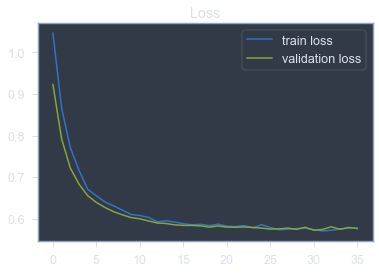

AUC 0.754039380149829
DAE learning curve 3/5


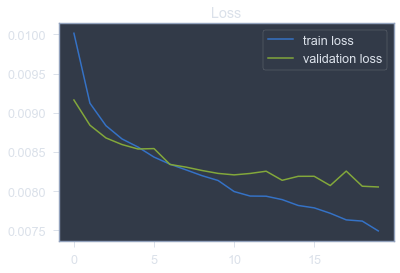

DNN learning curve 3/5


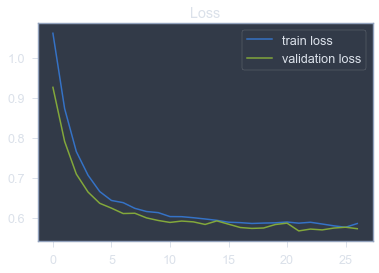

AUC 0.7653418137839224
DAE learning curve 4/5


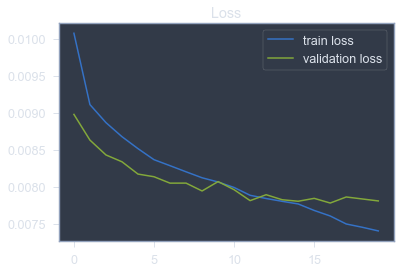

DNN learning curve 4/5


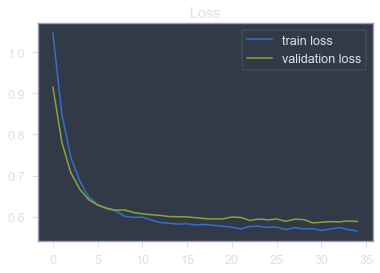

AUC 0.7413317555750841
DAE learning curve 5/5


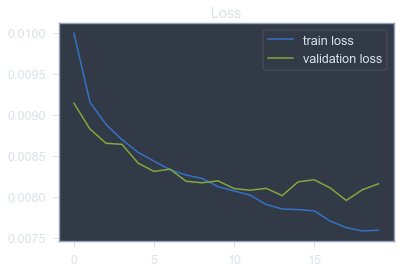

DNN learning curve 5/5


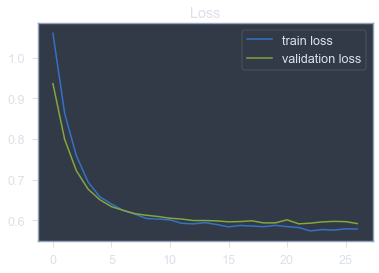

 20%|████████████████▌                                                                  | 1/5 [01:43<06:53, 103.35s/it]

AUC 0.7367728315262719
Random seeds reset: 1
DAE learning curve 1/5


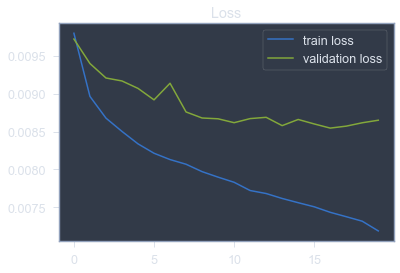

DNN learning curve 1/5


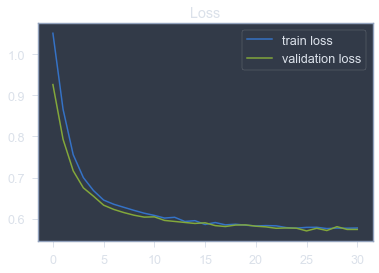

AUC 0.7628403128833822
DAE learning curve 2/5


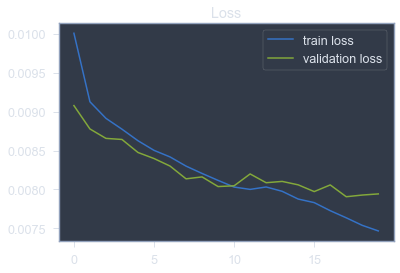

DNN learning curve 2/5


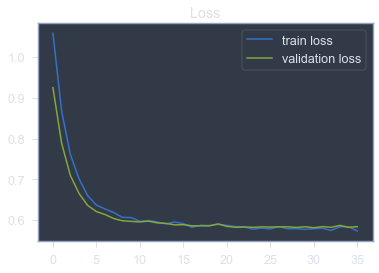

AUC 0.7420408766999331
DAE learning curve 3/5


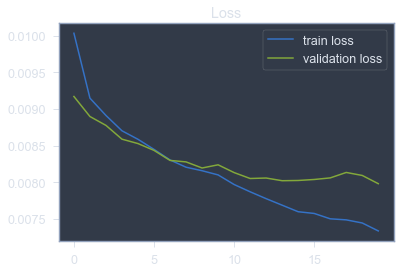

DNN learning curve 3/5


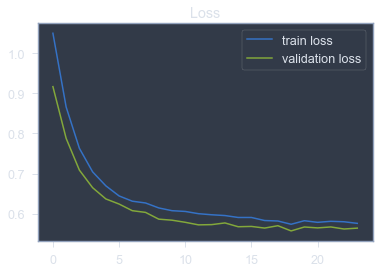

AUC 0.7772185050160529
DAE learning curve 4/5


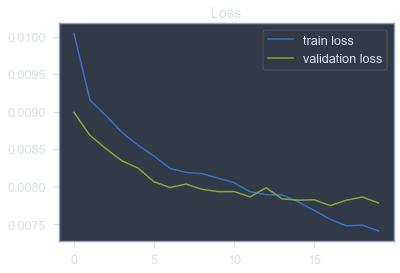

DNN learning curve 4/5


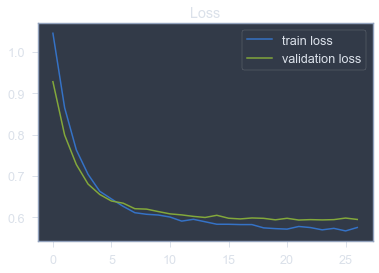

AUC 0.734053475563599
DAE learning curve 5/5


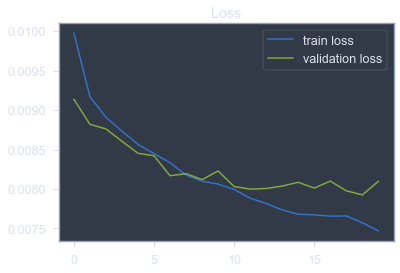

DNN learning curve 5/5


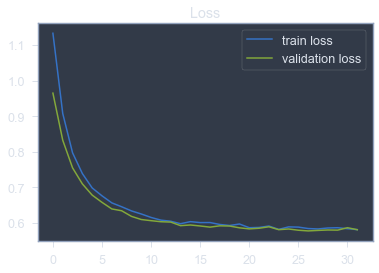

 40%|█████████████████████████████████▏                                                 | 2/5 [03:24<05:08, 102.71s/it]

AUC 0.755347338059494
Random seeds reset: 2
DAE learning curve 1/5


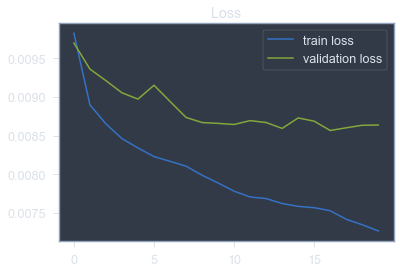

DNN learning curve 1/5


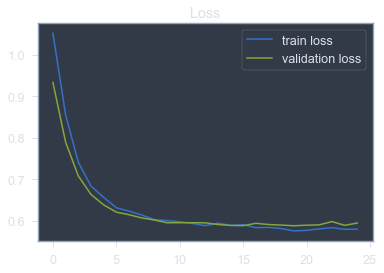

AUC 0.7385909806753618
DAE learning curve 2/5


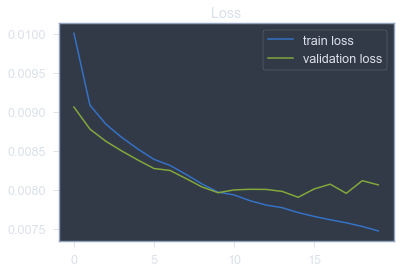

DNN learning curve 2/5


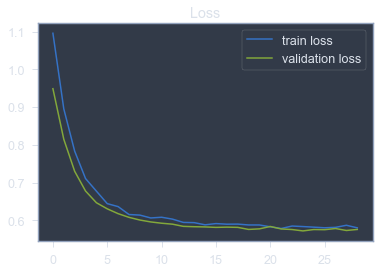

AUC 0.7582593034081319
DAE learning curve 3/5


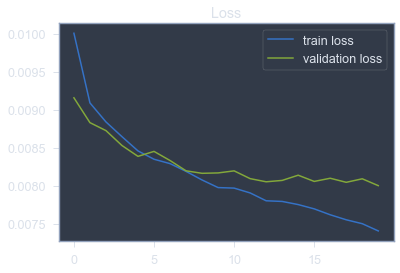

DNN learning curve 3/5


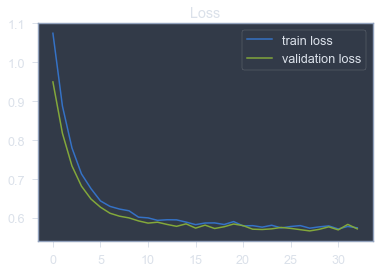

AUC 0.7634102200450705
DAE learning curve 4/5


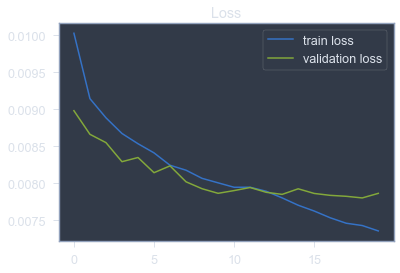

DNN learning curve 4/5


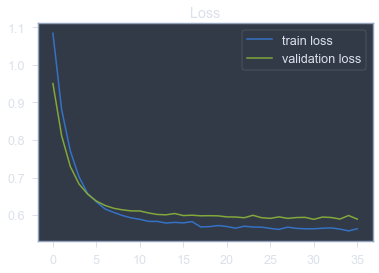

AUC 0.7397220941260408
DAE learning curve 5/5


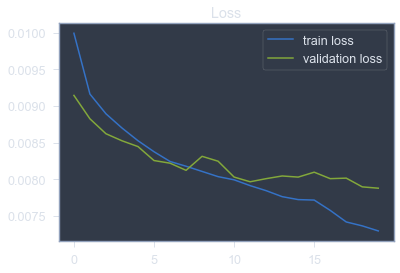

DNN learning curve 5/5


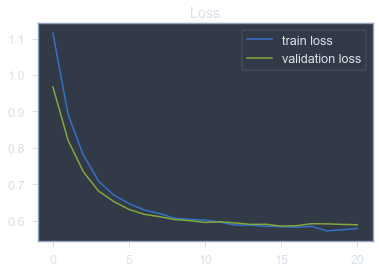

 60%|█████████████████████████████████████████████████▊                                 | 3/5 [04:59<03:20, 100.30s/it]

AUC 0.7455561926605505
Random seeds reset: 3
DAE learning curve 1/5


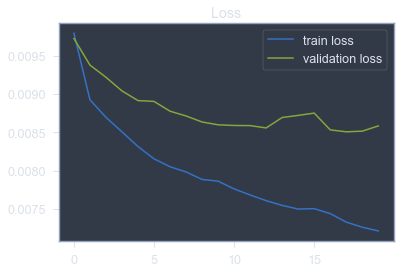

DNN learning curve 1/5


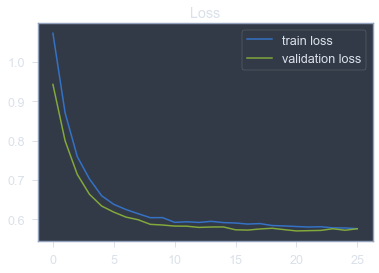

AUC 0.7556533920352211
DAE learning curve 2/5


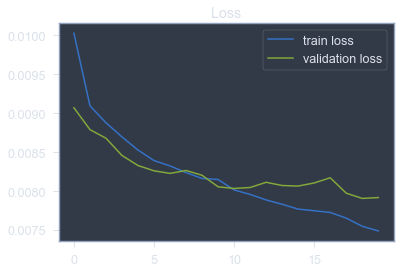

DNN learning curve 2/5


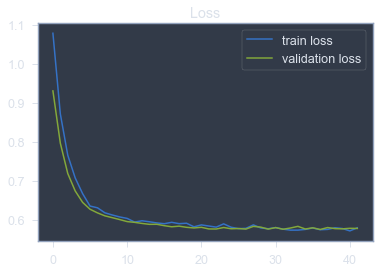

AUC 0.7526907448817115
DAE learning curve 3/5


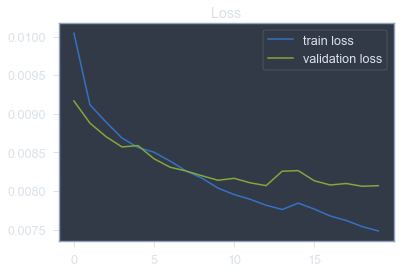

DNN learning curve 3/5


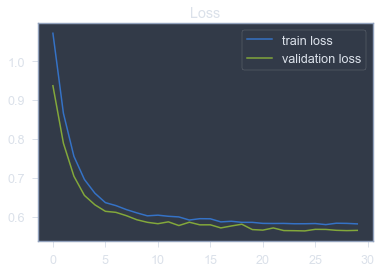

AUC 0.7723895206689231
DAE learning curve 4/5


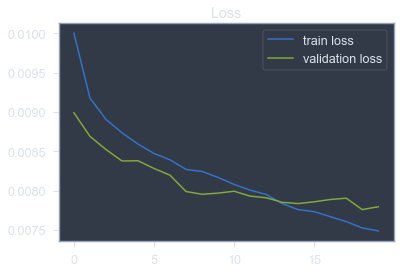

DNN learning curve 4/5


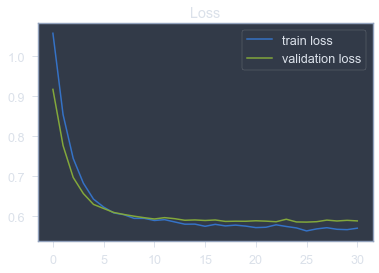

AUC 0.7373032515161271
DAE learning curve 5/5


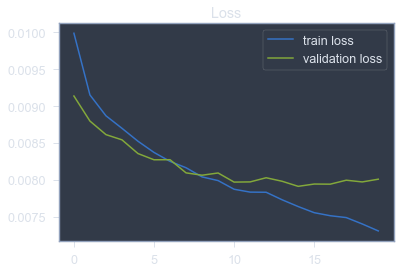

DNN learning curve 5/5


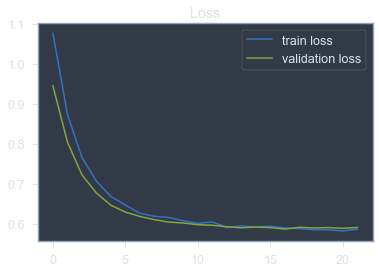

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [06:36<01:39, 99.25s/it]

AUC 0.7495699541284404
Random seeds reset: 4
DAE learning curve 1/5


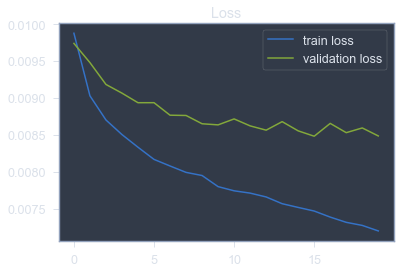

DNN learning curve 1/5


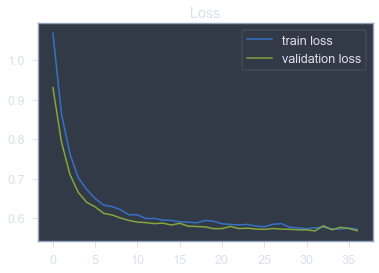

AUC 0.7644499743324256
DAE learning curve 2/5


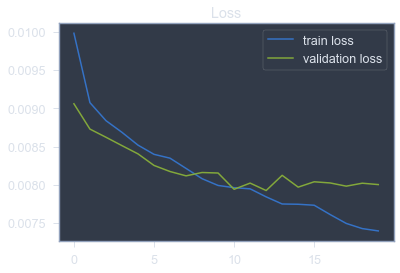

DNN learning curve 2/5


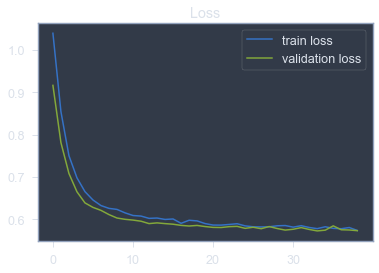

AUC 0.7572326004298232
DAE learning curve 3/5


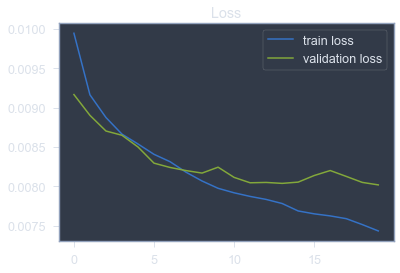

DNN learning curve 3/5


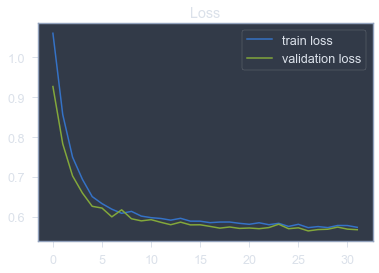

AUC 0.7684915297004289
DAE learning curve 4/5


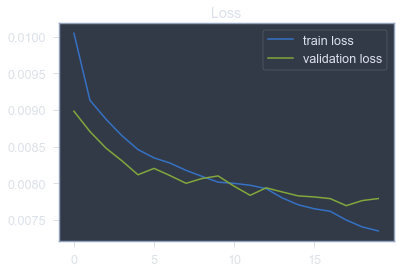

DNN learning curve 4/5


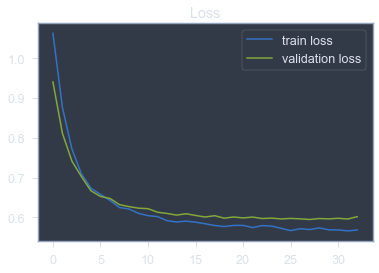

AUC 0.7315432737903612
DAE learning curve 5/5


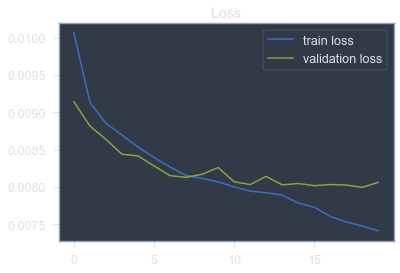

DNN learning curve 5/5


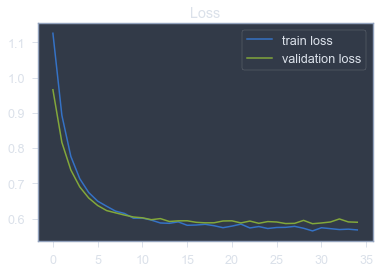

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [08:19<00:00, 99.98s/it]

AUC 0.7450262371420628

Validation Summary:
7     0.777219
17    0.772390
22    0.768492
2     0.765342
20    0.764450
12    0.763410
5     0.762840
0     0.762571
11    0.758259
21    0.757233
15    0.755653
9     0.755347
1     0.754039
16    0.752691
19    0.749570
14    0.745556
24    0.745026
6     0.742041
3     0.741332
13    0.739722
10    0.738591
18    0.737303
4     0.736773
8     0.734053
23    0.731543
dtype: float64
mean=0.75246, std=0.013


In [5]:
NFOLDS = 5
num_seeds = 5
preds = []
aucs = []
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=0)

for s in tqdm(range(num_seeds)):
    ##### Reset seed #####
    reset_seeds(s)
    
    ##### K-fold cross validation #####
    for k, (idx_train, idx_valid) in enumerate(kfold.split(X_train, y_train)):
        train_x = X_train[idx_train]
        train_y = y_train[idx_train]
        valid_x = X_train[idx_valid]
        valid_y = y_train[idx_valid]
    
        ### STEP 1: Build AE ###

        # Define the encoder dimension
        encoding_dim = 128

        # Input Layer
        input = keras.Input(shape = (train_x.shape[1], ))

        # Encoder Layers
        encoded1 = keras.layers.Dense(512, activation = 'relu')(input)
        encoded2 = keras.layers.Dense(256, activation = 'relu')(encoded1)
        encoded3 = keras.layers.Dense(128, activation = 'relu')(encoded2)
        encoded4 = keras.layers.Dense(encoding_dim, activation = 'relu')(encoded3)

        # Decoder Layers
        decoded1 = keras.layers.Dense(128, activation = 'relu')(encoded4)
        decoded2 = keras.layers.Dense(256, activation = 'relu')(decoded1)
        decoded3 = keras.layers.Dense(512, activation = 'relu')(decoded2)
        output = keras.layers.Dense(train_x.shape[1], activation = 'linear')(decoded3)

        # Combine Encoder and Deocder layers
        autoencoder = keras.Model(inputs=input, outputs=output)

        # Compile the model
        autoencoder.compile(optimizer = 'adam', loss = 'mse')

        # Train the model
        history = autoencoder.fit(train_x, train_x, epochs=20, batch_size=64,
                                  shuffle=False, validation_data=(valid_x,valid_x), verbose=0)

        print(f'DAE learning curve {k+1}/{NFOLDS}')
        plt.plot(history.history["loss"], label="train loss")
        plt.plot(history.history["val_loss"], label="validation loss")
        plt.legend()
        plt.title("Loss")
        plt.show()

        ### STEP 2: Reduce Dimension ###

        # Use a middle Bottleneck Layer to Reduce Dimension
        model = keras.Model(inputs=input, outputs=encoded4)
        train_x = model.predict(train_x)
        valid_x = model.predict(valid_x)
        test_x = model.predict(X_test)

        ### STEP 3: Build a DNN Model ###

        # Define the Model architecture
        input = keras.Input(shape = (train_x.shape[1], ))
        x = keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.L2(0.01))(input)
        x = keras.layers.Dropout(0.3)(x)
        x = keras.layers.Dense(16, activation='relu')(x)
        x = keras.layers.Dropout(0.3)(x)
        output = keras.layers.Dense(1, activation='sigmoid')(x)
        model = keras.Model(inputs=input, outputs=output)    

        # Train the Model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='roc_auc')])
        history = model.fit(train_x, train_y, epochs=100, batch_size=64,
                            validation_data=(valid_x, valid_y), 
                            callbacks=[keras.callbacks.EarlyStopping(patience=5)], verbose=0)
        print(f'DNN learning curve {k+1}/{NFOLDS}')
        plt.plot(history.history["loss"], label="train loss")
        plt.plot(history.history["val_loss"], label="validation loss")
        plt.legend()
        plt.title("Loss")
        plt.show()

        # Make Prediction
        auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
        aucs.append(auc)
        preds.append(model.predict(test_x).flatten())   
        print('AUC', auc)

### Validate the Models
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))     

### Ensemble Models & Make Submissions

In [6]:
# Power mean ensemble
THRESHOLD = 0.73  # Use only models whose AUC exceeds this value

p = 3.5
pred = 0
n = 0
for i in range(NFOLDS*num_seeds):
    if aucs.iloc[i] > THRESHOLD:
        pred = pred + preds[i]**p 
        n += 1
pred = pred / n    
pred = pred**(1/p)

# Make a submission file
t = pd.Timestamp.now()
fname = f"AE_DNN_submission_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'AE_DNN_submission_12122055.csv' is ready to submit.


<font color='tomato'><font color="#CC3D3D"><p>
# End